Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [1]:
import pandas as pd

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

In [3]:
df= pd.read_csv(r'C:\Users\samya\PyCharmProject\lab-eda-univariate\Dataset\amz_uk_price_prediction_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
# Generate frequency table
category_freq = df['category'].value_counts().reset_index()
category_freq.columns = ['Category', 'Frequency']


In [7]:
print("The top 5 category ",category_freq.head(5))

The top 5 category                                   Category  Frequency
0                       Sports & Outdoors     836265
1                                  Beauty      19312
2  Handmade Clothing, Shoes & Accessories      19229
3                             Bath & Body      19092
4                          Birthday Gifts      18978


In [8]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('float64'), dtype('O'), dtype('int64')]

In [9]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("category").nunique().sort_values(ascending=False)

Series([], dtype: float64)

In [10]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [11]:
freq_table= df['category'].value_counts().head(10)
print('Displaying frequency table:\n',freq_table)
proportion_table = df['category'].value_counts(normalize=True)
print('\n Propotional table: \n',proportion_table)

Displaying frequency table:
 category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

 Propotional table: 
 category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Motorbike Chassis                         0.000044
Alexa Built-In Devices                    0.000044
Plugs 

C:\Users\samya\AppData\Local\Temp\ipykernel_11868\722068890.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


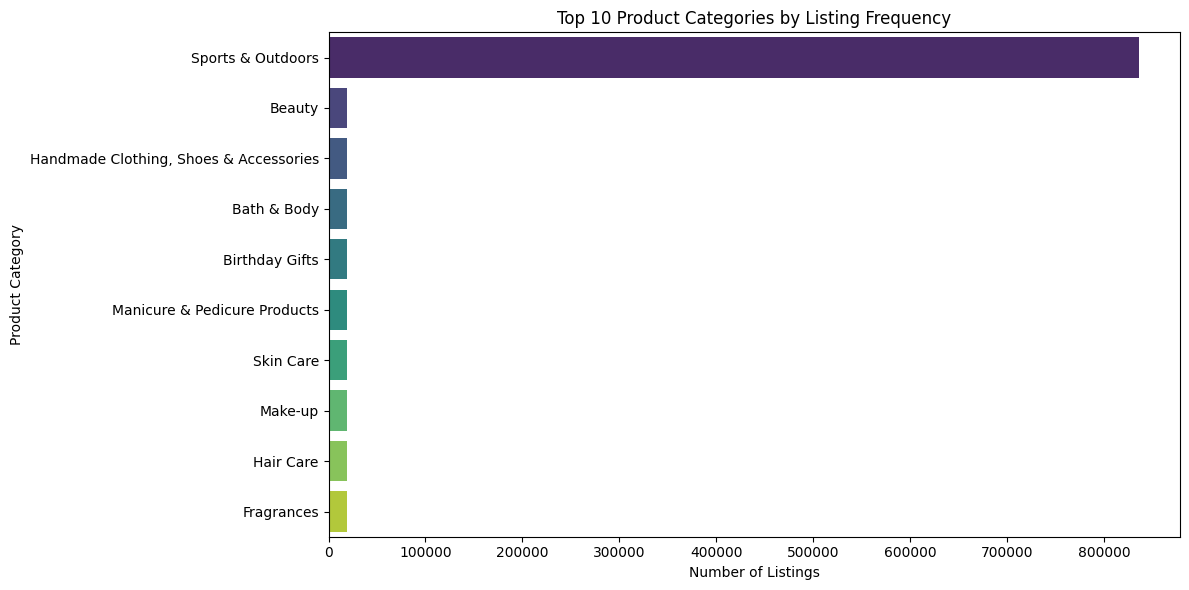

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for top 10 categories
top_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Listing Frequency')
plt.xlabel('Number of Listings')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

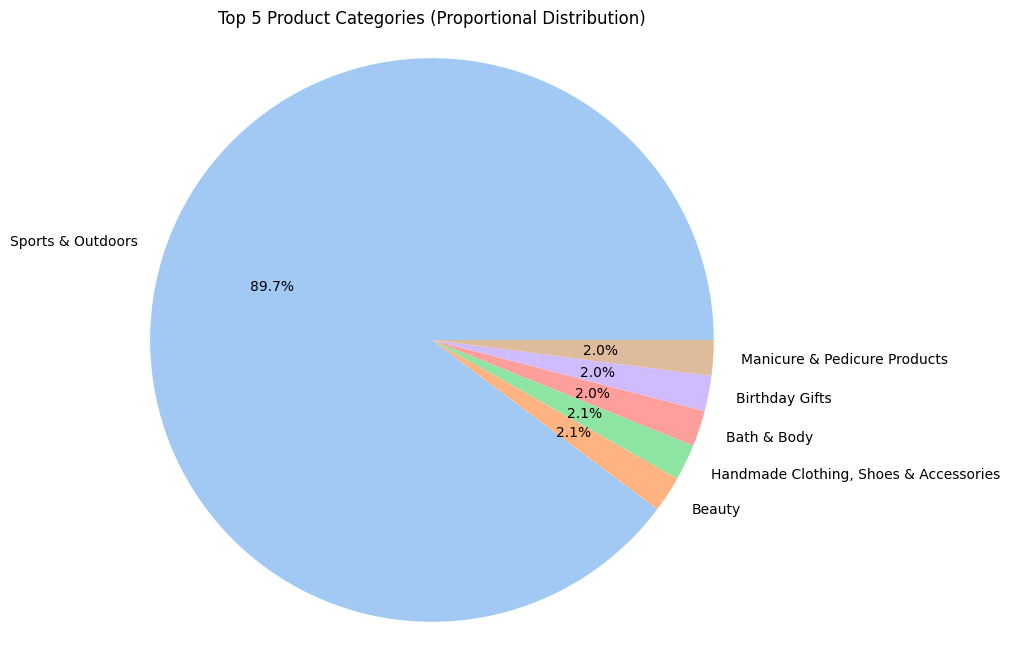

In [13]:
# Pie chart for top 5 categories
top_5 = df['category'].value_counts().head(6)

plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=0, colors=sns.color_palette('pastel'))
plt.title('Top 5 Product Categories (Proportional Distribution)')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [15]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [16]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [17]:
mean_value= df['price'].mean()
print("Mean value of Prices:", mean_value )

Mean value of Prices: 89.24380943923663


In [18]:
median_value=df['price'].median()
print("median:", median_value  )

median: 19.09


In [19]:
mode_price= df['price'].mode()
print("mode:",mode_price)

mode: 0    9.99
Name: price, dtype: float64


In [20]:
variance_price= df['price'].var()
print("variance:",variance_price)
std_dev= df['price'].std()
print('Standard Dev:',std_dev)
max_price = df['price'].max()
print('max price',max_price)
min_price= df['price'].min()
print("min price",min_price)
range= max_price-min_price
print('range',range)


variance: 119445.48532254907
Standard Dev: 345.60886175349884
max price 100000.0
min price 0.0
range 100000.0


In [21]:
quant=df['price'].quantile([0.25, 0.5, 0.75])
print('Quantile:\n',quant)


Quantile:
 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

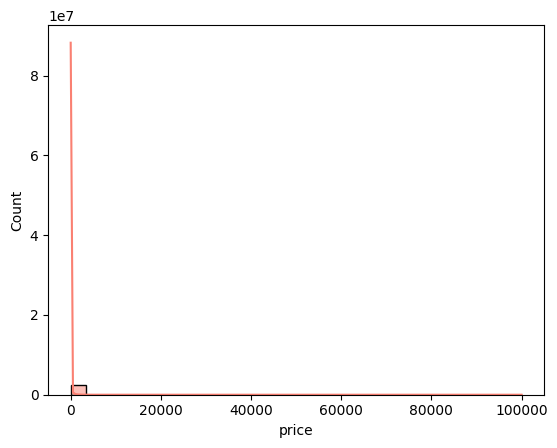

In [22]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

In [23]:
mean_value= df['stars'].mean()
print("Mean value of stars:", mean_value )
median_value=df['stars'].median()
print("median:", median_value  )
mode_price= df['stars'].mode()
print("mode:",mode_price)
variance_price= df['stars'].var()
print("variance:",variance_price)
std_dev= df['stars'].std()
print('Standard Dev:',std_dev)
max_price = df['stars'].max()
print('max price',max_price)
min_price= df['stars'].min()
print("min price",min_price)
range= max_price-min_price
print('range',range)


Mean value of stars: 2.152836472966065
median: 0.0
mode: 0    0.0
Name: stars, dtype: float64
variance: 4.817434029796862
Standard Dev: 2.1948653785134207
max price 5.0
min price 0.0
range 5.0


C:\Users\samya\AppData\Local\Temp\ipykernel_11868\769006091.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


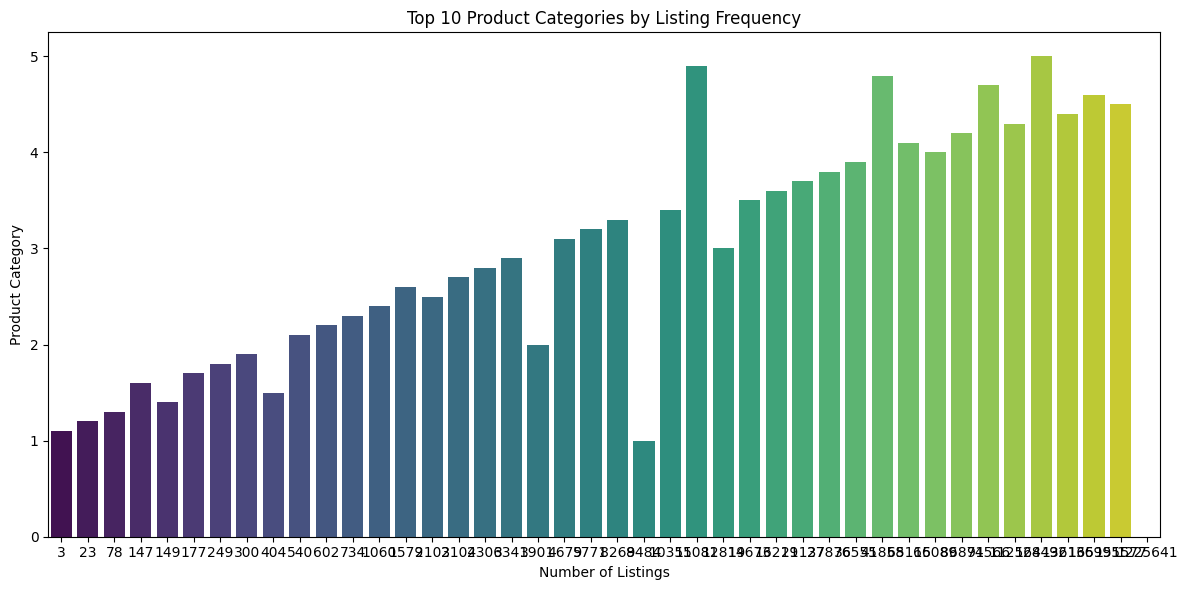

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for top 10 categories
top_categories = df['stars'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Listing Frequency')
plt.xlabel('Number of Listings')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

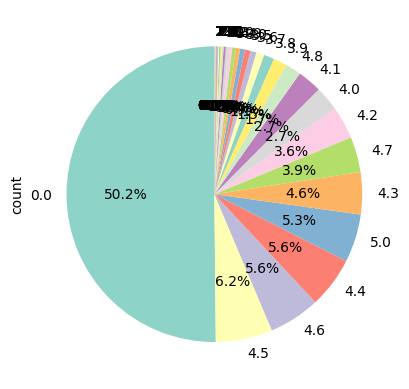

In [24]:
# Plotting a pie chart of the 'MSZoning' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df['stars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))